## EDA + PCA

## Imports & load data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

DATA_PATH = Path("../data/processed/har_clean.csv")
df = pd.read_csv(DATA_PATH)

df.shape


(10299, 565)

In [3]:
df.head()
df.isna().sum().sum()

np.int64(0)

### Class distribution

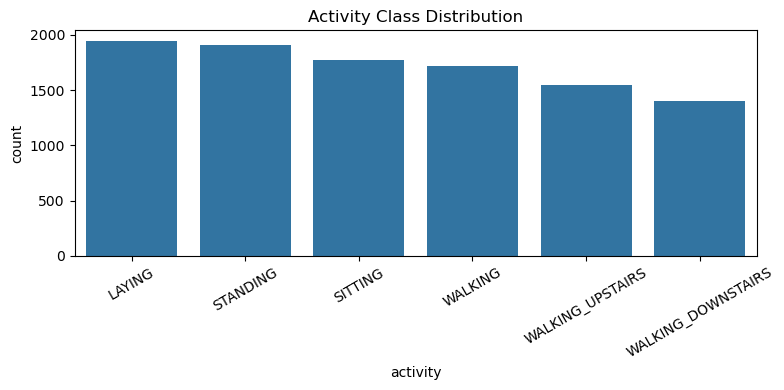

activity
LAYING                0.188756
STANDING              0.185067
SITTING               0.172541
WALKING               0.167201
WALKING_UPSTAIRS      0.149917
WALKING_DOWNSTAIRS    0.136518
Name: proportion, dtype: float64

In [4]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="activity", order=df["activity"].value_counts().index)
plt.title("Activity Class Distribution")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

df["activity"].value_counts(normalize=True)


In [6]:
feature_cols = [c for c in df.columns if c not in ["subject_id", "activity_code", "activity", "split"]]

X = df[feature_cols]
y = df["activity"]

X.shape, y.shape

((10299, 561), (10299,))

### Standardization

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


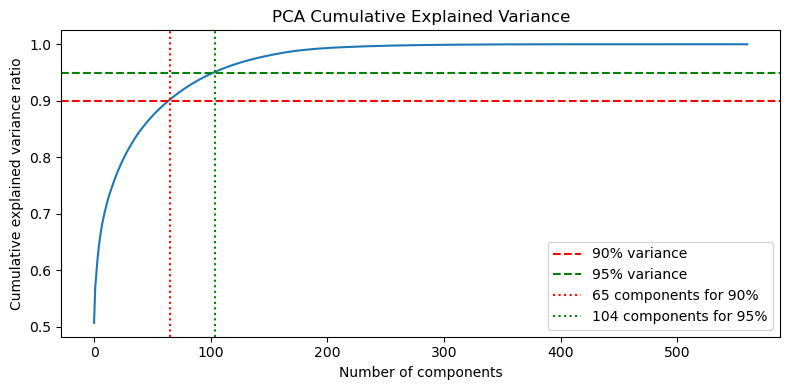

Components needed for 90% variance: 65
Components needed for 95% variance: 104


In [9]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,4))
plt.plot(explained_var)
plt.axhline(y=0.90, color="r", linestyle="--", label="90% variance")
plt.axhline(y=0.95, color="g", linestyle="--", label="95% variance")

# find how many components are needed to reach 90% and 95%
n90 = np.argmax(explained_var >= 0.90) + 1
n95 = np.argmax(explained_var >= 0.95) + 1

plt.axvline(x=n90, color="r", linestyle=":", label=f"{n90} components for 90%")
plt.axvline(x=n95, color="g", linestyle=":", label=f"{n95} components for 95%")

plt.title("PCA Cumulative Explained Variance")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance ratio")
plt.legend()
plt.tight_layout()
plt.show()

print(f"Components needed for 90% variance: {n90}")
print(f"Components needed for 95% variance: {n95}")
